In [1]:
 %matplotlib inline

import numpy as np
import scipy.stats

# чуть более красивые картинки
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

np.random.seed(42)

In [2]:
n_s = np.logspace(0.6, 7, num=100, dtype=np.int64)

In [3]:
n_s

array([       3,        4,        5,        6,        7,        8,
              9,       11,       13,       15,       17,       20,
             23,       27,       31,       37,       43,       50,
             58,       67,       78,       90,      105,      122,
            141,      164,      190,      221,      257,      298,
            346,      401,      466,      541,      628,      728,
            845,      981,     1139,     1321,     1534,     1780,
           2066,     2397,     2782,     3229,     3747,     4348,
           5046,     5857,     6797,     7888,     9154,    10623,
          12328,    14307,    16603,    19268,    22361,    25950,
          30115,    34948,    40558,    47068,    54622,    63389,
          73564,    85371,    99073,   114975,   133429,   154845,
         179698,   208541,   242012,   280856,   325935,   378248,
         438959,   509413,   591176,   686062,   796177,   923967,
        1072267,  1244369,  1444095,  1675878,  1944862,  2257

In [36]:
gamma = 0.9

In [37]:
std = np.random.uniform(high=6)

In [38]:
std

3.738699068728126

In [39]:
var = std ** 2

In [40]:
var

13.977870726508556

In [41]:
eps = 1e-1

In [42]:
chi2_diffs = []
snd_diffs = []

in_chi2 = 0
in_snd = 0

for n in n_s:
    x = np.random.normal(scale=std, size=n)
    
    ## chi2
    left = np.sum(x ** 2) / scipy.stats.chi2.ppf((1 + gamma) / 2, n)
    right = np.sum(x ** 2) / scipy.stats.chi2.ppf((1 - gamma) / 2, n)
    if left - eps <= var <= right + eps:
        in_chi2 += 1
    chi2_diffs.append(right - left)
    
    ## with snd
    left = n * np.sum(x ** 2)  / scipy.stats.norm.ppf((3 + gamma) / 4, n) ** 2
    right = n * np.sum(x ** 2) / scipy.stats.norm.ppf((3 - gamma) / 4, n) ** 2
    if left - eps <= var <= right + eps:
        in_snd += 1
    snd_diffs.append(right - left)

In [43]:
print(f"Количество раз, когда дисперсия внутри первого интервала: {in_chi2}, второго — {in_snd}")

Количество раз, когда дисперсия внутри первого интервала: 96, второго — 58


In [44]:
plt.rc('text', usetex=True)

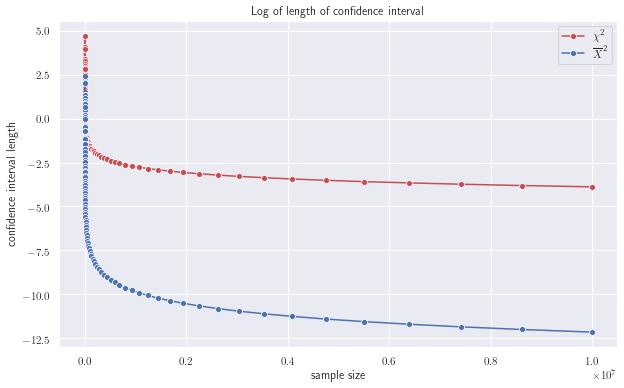

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=n_s, y=np.log(chi2_diffs), color="r", label=r"$ {\chi}^2 $", marker="o")
sns.lineplot(x=n_s, y=np.log(snd_diffs), color="b", label=r"$ \overline {X}^2 $", marker="o")
plt.title("Log of length of confidence interval")
plt.xlabel("sample size")
plt.ylabel("confidence interval length")
plt.show()

# Вывод:
* дисперсия действительно попадает в доверительные интервалы данных статистик
* однако, первая статистика является куда более "надежной"
* но ассимптотически вторая тоже становится норм (при большом n дисперсия попадает в интервал)
* при большем гамме ситуация похожая
* у второй статистики длина доверительно интервала меньше